<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS2_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [5]:
# TODO - during class, but please help!

# Coke or Pepsi experiment
# This will be represented as a binomial random variable
# 0 = Likes Pepsi
# 1 = Likes Coke

# We want a list of 30 observations (sample size n=30)
# Start by generating random data
import random
# help(random.randint)
random.seed(100)
sample = [random.randint(0, 1) for _ in range(30)]
print(sample)

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]


In [6]:
import pandas as pd
df = pd.DataFrame(sample)
df.describe()

,0
count,30.000000
mean,0.533333
std,0.507416
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


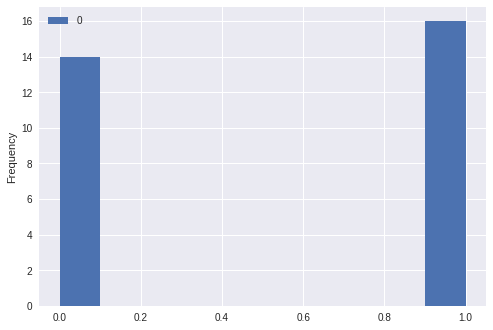

In [7]:
df.plot.hist();

In [8]:
# Now with confidence!

import scipy
# help(scipy.stats.ttest_1samp)
scipy.stats.ttest_1samp(df[0], 0.5)

Ttest_1sampResult(statistic=0.3598114585644621, pvalue=0.7215952675845513)

In [9]:
# Let's try to calculate test statistics from scratch-ish
# We need the sample standard error
df[0].std()

0.507416263404925

In [10]:
from math import sqrt
df[0].std() / sqrt(30)

0.09264111117062017

In [11]:
# One-liner from Chris
(df[0].mean() - 0.5) / (df[0].std() / (30 ** (1/2)))

0.3598114585644621

In [0]:
# Let's make a reusable function, and do it from scratch!
def std(sample, mean):
  std = 0
  for obs in sample:
    std += (obs - mean)**2
  return (std / (len(sample) - 1)) ** (1/2)

def calculate_t_stat(sample, null_hyp):
  sample_mean = sum(sample) / len(sample)
  sample_std = std(sample, sample_mean)
  return (sample_mean - null_hyp) / (sample_std / (len(sample) ** (1/2)))

As $n \rightarrow \infty$, $\hat{\mu} \approx \mu$

("mu hat" is the sample mean, mu is the "true" population mean)

In [13]:
calculate_t_stat(survey_data, 0.5)

NameError: ignored

In [0]:
pd.DataFrame(survey_data).std()

In [0]:
# Let's test it
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

# Try this with both scipy and ours
scipy.stats.ttest_1samp(survey_data, 0.5)

In [0]:
len(survey_data)

In [0]:
help(scipy.stats.t)

In [0]:
t = scipy.stats.t(len(survey_data))
t.cdf(calculate_t_stat(survey_data, 0.5))

In [0]:
help(t.cdf)

In [0]:
# A hacky solution
2 * (1 - t.cdf(calculate_t_stat(survey_data, 0.5)))

In [0]:
# On your own optional stretch goal:
# Figure out how to get t.cdf to give us 1/2 tailed tests and not just the base

# Put the entire above "experiment" in a loop
# and run it a bunch of times for a bunch of different seeds
# and see how often the p value holds

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
from scipy import stats
import numpy as np
import pandas as pd

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [15]:
#    1. Class Name: 2 (democrat, republican)
#    2. handicapped-infants: 2 (y,n)
#    3. water-project-cost-sharing: 2 (y,n)
#    4. adoption-of-the-budget-resolution: 2 (y,n)
#    5. physician-fee-freeze: 2 (y,n)
#    6. el-salvador-aid: 2 (y,n)
#    7. religious-groups-in-schools: 2 (y,n)
#    8. anti-satellite-test-ban: 2 (y,n)
#    9. aid-to-nicaraguan-contras: 2 (y,n)
#   10. mx-missile: 2 (y,n)
#   11. immigration: 2 (y,n)
#   12. synfuels-corporation-cutback: 2 (y,n)
#   13. education-spending: 2 (y,n)
#   14. superfund-right-to-sue: 2 (y,n)
#   15. crime: 2 (y,n)
#   16. duty-free-exports: 2 (y,n)
#   17. export-administration-act-south-africa: 2 (y,n)

colNames = [i for i in range(1,18)]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=colNames) 

# preview data
print("df shape:"), print(df.shape), print("")
print("df columns:"), print(df.columns), print("")
print("df dtypes:"), print(df.dtypes), print("")
print("df head():"), print(df.head()), print("")
print("df sample(7):"), print(df.sample(7)), print("")
print("df isnull().sum().sum():"), print(df.isnull().sum().sum()), print("")
print("df isnull().sum():"), print(df.isnull().sum()), print("")

df shape:
(435, 17)

df columns:
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

df dtypes:
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
dtype: object

df head():
           1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17
0  republican  n  y  n  y  y  y  n  n  n  y  ?  y  y  y  n  y
1  republican  n  y  n  y  y  y  n  n  n  n  n  y  y  y  n  ?
2    democrat  ?  y  y  ?  y  y  n  n  n  n  y  n  y  y  n  n
3    democrat  n  y  y  n  ?  y  n  n  n  n  y  n  y  n  n  y
4    democrat  y  y  y  n  y  y  n  n  n  n  y  ?  y  y  y  y

df sample(7):
             1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17
31     democrat  y  y  y  n  n  n  y  y  y  n  y  n  n  n  y  ?
101    democrat  y  n  y  n  y  y  y  n  n  n  y  n  n  y  n  y
272    democrat  y  n  y  n  n  n  y  y  y

(None, None, None)

In [0]:
df = df.replace('?', np.nan)
df = df.replace({'y': 1, 'n': 0})

In [17]:
print("df sample(7):"), print(df.sample(7)), print("")
print("df isnull().sum().sum():"), print(df.isnull().sum().sum()), print("")
print("df isnull().sum():"), print(df.isnull().sum()), print("")

df sample(7):
           1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17
263  democrat  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN
331  democrat  1.0  NaN  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN
380  democrat  1.0  1.0  1.0  0.0  0.0  1.0  NaN  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0
174  democrat  1.0  NaN  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN
41   democrat  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN
332  democrat  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  NaN
104  democrat  NaN  NaN  NaN  NaN  0.0  1.0  1.0  1.0  1.0  1.0  NaN  0.0  1.0  1.0  0.0  NaN

df isnull().sum().sum():
392

df isnull().sum():
1       0
2      12
3      48
4      11
5      11
6      15
7      11
8      14
9      15
10     22
11      7
12     21
13     31
14     25
15     17
16     28
17    104
dtype: int64



(None, None, None)

In [18]:
# Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
# Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

dem_df = df[df[1]=='democrat']
rep_df = df[df[1]=='republican']

print(dem_df.sample(7))
print("")
print(rep_df.sample(7))
print("")
print(dem_df.shape, rep_df.shape)


           1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17
90   democrat  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
220  democrat  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN
137  democrat  0.0  NaN  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0
319  democrat  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN
118  democrat  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0
262  democrat  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  NaN  0.0  1.0  1.0
88   democrat  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0

             1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17
191  republican  0.0  1.0  0.0  1.0  1.0  1.0  0.0  NaN  0.0  1.0  0.0  1.0  1.0  1.0  0.0  NaN
38   republican  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0

In [19]:
#    1. Class Name: 2 (democrat, republican)
#    2. handicapped-infants: 2 (y,n)
#    3. water-project-cost-sharing: 2 (y,n)
#    4. adoption-of-the-budget-resolution: 2 (y,n)
#    5. physician-fee-freeze: 2 (y,n)
#    6. el-salvador-aid: 2 (y,n)
#    7. religious-groups-in-schools: 2 (y,n)
#    8. anti-satellite-test-ban: 2 (y,n)
#    9. aid-to-nicaraguan-contras: 2 (y,n)
#   10. mx-missile: 2 (y,n)
#   11. immigration: 2 (y,n)
#   12. synfuels-corporation-cutback: 2 (y,n)
#   13. education-spending: 2 (y,n)
#   14. superfund-right-to-sue: 2 (y,n)
#   15. crime: 2 (y,n)
#   16. duty-free-exports: 2 (y,n)
#   17. export-administration-act-south-africa: 2 (y,n)

# Democrat Votes Summary
# Mean higher than 0.5 -> more support
print("")
print("dem_df describe(include='all'),:")
print(dem_df.describe(include='all'),)
print("")
print("Democrats Statistic:")
for i in range(2,18):
  print(i ,stats.ttest_1samp(dem_df[i],0.5,nan_policy='omit'))

# Republican Votes Summary
# Mean higher than 0.5 -> more support
print("")
print("rep_df describe(include='all'),:")
print(rep_df.describe(include='all'),)
print("")
print("\nRepublicans Statistic:")
for i in range(2,18):
  print(i ,stats.ttest_1samp(rep_df[i],0.5,nan_policy='omit'))


dem_df describe(include='all'),:
              1           2           3           4           5           6           7           8           9           10          11          12          13          14          15          16          17
count        267  258.000000  239.000000  260.000000  259.000000  255.000000  258.000000  259.000000  263.000000  248.000000  263.000000  255.000000  249.000000  252.000000  257.000000  251.000000  185.000000
unique         1         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
top     democrat         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
freq         267         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN      

# Analysis

Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

0 = no, 1 = yes

With a mean of 0.888462, Dem vote mostly YES on issue 4. adoption-of-the-budget-resolution
Ttest_1sampResult(statistic=19.859406568628835, pvalue=5.75931504660857e-54)


With a mean of 0.134146, Rep vote mostly NO on issue 4. adoption-of-the-budget-resolution
Ttest_1sampResult(statistic=-13.705331355148527, pvalue=6.249973784238298e-29)


With a mean of 0.951515, Rep vote mostly YES on issue 6. el-salvador-aid
Ttest_1sampResult(statistic=26.920515819250607, pvalue=4.531756691646779e-62)


With a mean of 0.215686, Dem vote mostly NO on issue 6. el-salvador-aid
Ttest_1sampResult(statistic=-11.016877548066462, pvalue=2.5007537432253433e-23)

In [20]:
# Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)
print("Dem vs Rep 2 samples t-test:")
for i in range(2,18):
  print(i ,stats.ttest_ind(dem_df[i], rep_df[i],nan_policy='omit'))

Dem vs Rep 2 samples t-test:
2 Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)
3 Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)
4 Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)
5 Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)
6 Ttest_indResult(statistic=-21.13669261173219, pvalue=5.600520111729011e-68)
7 Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20)
8 Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)
9 Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)
10 Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)
11 Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)
12 Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)
13 Ttest_indResult(statistic=-20.500685724563073, pvalue=1.8834203990450192e-64)
14 Ttest_indResult(statistic=-13

# Analysis
**there may not be much of a difference on:**

Water-project-cost-sharing

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/